# Step 1: Exploratory Data Analysis (EDA)

In this step, we'll:

Load the dataset to confirm that it’s accessible.
Inspect basic statistics and data structure.
Analyze key columns, such as error_type, tags, and code characteristics.
Visualize distributions to uncover any interesting patterns.

# **1.1 Load the Dataset**
Let’s start by loading CodeSO-QR.csv and inspecting the first few rows to confirm everything loaded correctly.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodeSO-QR.csv')
df.head()


,func_name,code,original_string,language,buggy_code,correct_code,error_type,question_title,question_body,tags
0,predict,"def predict(X_img_path, knn_clf=None, model_pa...","def predict(X_img_path, knn_clf=None, model_pa...",python,"def predict(X_img_path, knn_clf=None, model_pa...","def predict(X_img_path, knn_clf=None, model_pa...",syntax,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>
1,show_prediction_labels_on_image,"def show_prediction_labels_on_image(img_path, ...","def show_prediction_labels_on_image(img_path, ...",python,"def show_prediction_labels_on_image(img_path, ...","def show_prediction_labels_on_image(img_path, ...",syntax,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...
2,show_prediction_labels_on_image,"def show_prediction_labels_on_image(img_path, ...","def show_prediction_labels_on_image(img_path, ...",python,"def show_prediction_labels_on_image(img_path, ...","def show_prediction_labels_on_image(img_path, ...",syntax,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...
3,show_prediction_labels_on_image,"def show_prediction_labels_on_image(img_path, ...","def show_prediction_labels_on_image(img_path, ...",python,"def show_prediction_labels_on_image(img_path, ...","def show_prediction_labels_on_image(img_path, ...",syntax,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...
4,show_prediction_labels_on_image,"def show_prediction_labels_on_image(img_path, ...","def show_prediction_labels_on_image(img_path, ...",python,"def show_prediction_labels_on_image(img_path, ...","def show_prediction_labels_on_image(img_path, ...",syntax,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...


# 1.2 Basic Information and Statistics
After loading the data, check the structure, data types, and any missing values.

In [18]:
# Get basic info on data types and non-null counts
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   func_name        23784 non-null  object
 1   code             23784 non-null  object
 2   original_string  23784 non-null  object
 3   language         23784 non-null  object
 4   buggy_code       23784 non-null  object
 5   correct_code     23784 non-null  object
 6   error_type       23784 non-null  object
 7   question_title   23784 non-null  object
 8   question_body    23784 non-null  object
 9   tags             23784 non-null  object
dtypes: object(10)
memory usage: 1.8+ MB
Missing values:
 func_name          0
code               0
original_string    0
language           0
buggy_code         0
correct_code       0
error_type         0
question_title     0
question_body      0
tags               0
dtype: int64


# 1.3 Key Insights and Distributions
Next, let’s start analyzing key aspects of the dataset, specifically focusing on:

Error Types: Distribution of error_type.
Tags: Top tags in Stack Overflow questions.
Code Lengths: Distribution of code lengths in buggy_code and correct_code.

# 1.3.1 Error Type Distribution

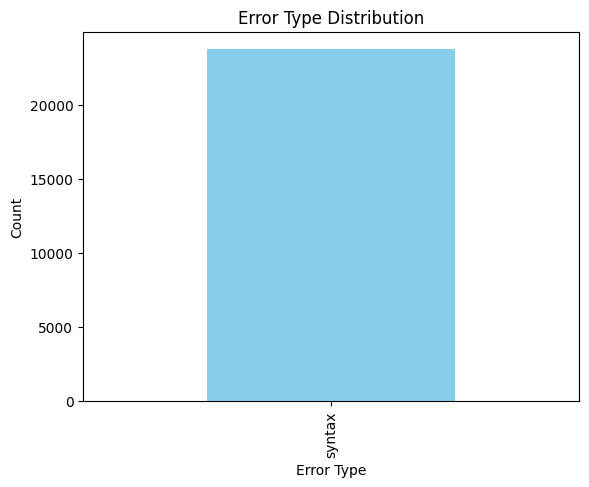

In [19]:
# Plot the distribution of error types
import matplotlib.pyplot as plt

df['error_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Error Type Distribution')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.show()


# 1.3.2 Top Tags in Stack Overflow Questions
Stack Overflow tags can tell us which programming languages or topics are most associated with questions and debugging needs. Here’s how to look at the top 10 tags.

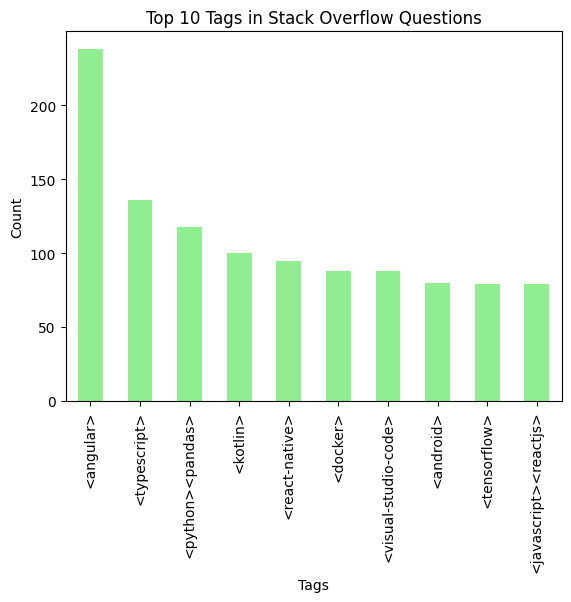

In [20]:
# Split tags by commas if they are concatenated in the dataset
df['tags'] = df['tags'].str.split(',')

# Flatten and count tags
tags = df['tags'].explode()
top_tags = tags.value_counts().head(10)

# Plot the top tags
top_tags.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Tags in Stack Overflow Questions')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

# 1.3.3 Code Lengths in Buggy and Correct Code
Analyzing the length of buggy_code vs. correct_code can show us if there's any notable difference in typical length between buggy and corrected versions.

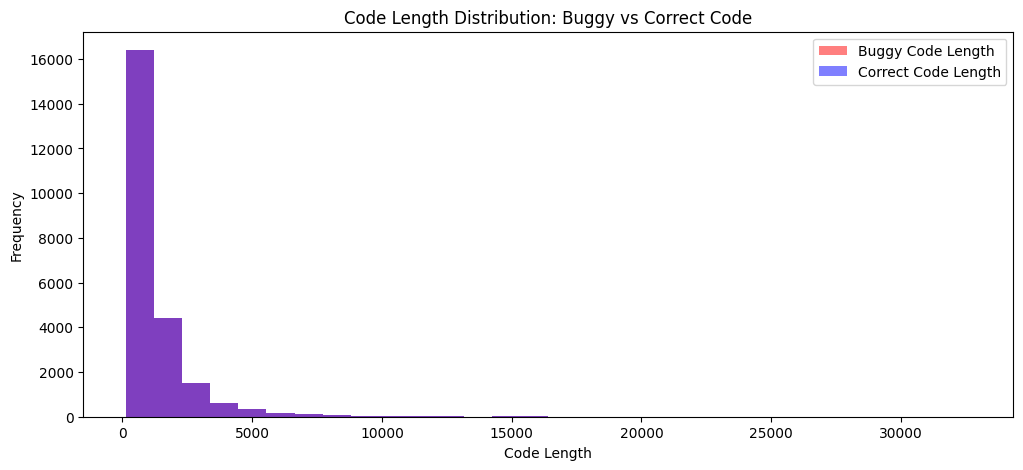

In [21]:
# Add columns for code lengths
df['buggy_code_length'] = df['buggy_code'].str.len()
df['correct_code_length'] = df['correct_code'].str.len()

# Plot distribution of code lengths
plt.figure(figsize=(12, 5))
plt.hist(df['buggy_code_length'], bins=30, alpha=0.5, label='Buggy Code Length', color='red')
plt.hist(df['correct_code_length'], bins=30, alpha=0.5, label='Correct Code Length', color='blue')
plt.title('Code Length Distribution: Buggy vs Correct Code')
plt.xlabel('Code Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 2 Data Preprocessing
**Tokenize the Code** : Convert buggy_code and correct_code to tokens.

**Padding** : Pad sequences to ensure consistent input/output lengths.

**Split Data**: Create training and validation splits.

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# 2.1 Define Tokenizer and Pad Sequences
We’ll create a tokenizer to convert text into integer sequences and pad these sequences to maintain consistent input/output lengths.

Define Vocabulary Size and Maximum Sequence Length
Set the vocab_size and max_length based on your dataset. These parameters control the vocabulary size and the maximum length for each sequence.

In [23]:
# Define max vocabulary size and max sequence length
vocab_size = 10000
max_length = 100


# 2.2 Initialize and Fit Tokenizer
Fit a tokenizer on both the buggy and correct code columns of your dataset. Assuming your dataset has columns named buggy_code and correct_code:

In [24]:
# Initialize a tokenizer and fit it on both buggy and correct code
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['buggy_code'].tolist() + df['correct_code'].tolist())


# 2.3 Tokenize and Pad Sequences
Define a helper function to tokenize and pad the sequences:

In [25]:
def tokenize_and_pad(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    return pad_sequences(sequences, maxlen=max_length, padding='post')

# Tokenize and pad data
X = tokenize_and_pad(df['buggy_code'])
y = tokenize_and_pad(df['correct_code'])


# Step 3: Split Data into Training and Validation Sets

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Prepare Decoder Input and Target Data
Now, let’s prepare decoder_input_data and decoder_target_data without one-hot encoding, as we discussed. These will be the inputs and outputs for the decoder during training.

For Training Data

In [27]:
decoder_input_data = np.zeros((X_train.shape[0], max_length))
decoder_target_data = np.zeros((X_train.shape[0], max_length))

for i, target_sequence in enumerate(y_train):
    for t, word in enumerate(target_sequence):
        if t > 0:
            decoder_input_data[i, t-1] = word  # Shifted input for teacher forcing
            decoder_target_data[i, t] = word  # Use integer labels


For Validation Data

In [28]:
decoder_input_data_val = np.zeros((X_val.shape[0], max_length))
decoder_target_data_val = np.zeros((X_val.shape[0], max_length))

for i, target_sequence in enumerate(y_val):
    for t, word in enumerate(target_sequence):
        if t > 0:
            decoder_input_data_val[i, t-1] = word
            decoder_target_data_val[i, t] = word


In [29]:
# Model Parameters
embedding_dim = 128  # Size of the embedding layer
latent_dim = 256     # Size of the LSTM layer
vocab_size = 10000   # Size of the vocabulary (adjust based on your data)
max_length = 100     # Maximum sequence length for input data


In [30]:
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.models import Model

# Encoder
encoder_inputs = Input(shape=(max_length,))
encoder_embedding = Embedding(vocab_size, embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]


In [31]:
# Decoder
decoder_inputs = Input(shape=(max_length,))
decoder_embedding = Embedding(vocab_size, embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)


In [32]:
# Define the Seq2Seq model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary to confirm the structure
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 100, 128)       │      1,280,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 100, 128)       │      1,280,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ [(None, 256), (None,   │        394,240 │ embedding_2[0][0]      │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ [(None, 100, 256),     │        394,240 │ embedding_3[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm_2[0][1],          │
│                           │ 256)]                  │                │ lstm_2[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 100, 10000)     │      2,570,000 │ lstm_3[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,918,480 (22.58 MB)

 Trainable params: 5,918,480 (22.58 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(
    [X_train, decoder_input_data], decoder_target_data,
    validation_data=([X_val, decoder_input_data_val], decoder_target_data_val),
    batch_size=32,  # Adjust based on available memory
    epochs=10
)


Epoch 1/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.2298 - loss: 5.8195 - val_accuracy: 0.3638 - val_loss: 4.0914
Epoch 2/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.4373 - loss: 3.7026 - val_accuracy: 0.6451 - val_loss: 2.5204
Epoch 3/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.6960 - loss: 2.2054 - val_accuracy: 0.8285 - val_loss: 1.3891
Epoch 4/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.8513 - loss: 1.1870 - val_accuracy: 0.9027 - val_loss: 0.8138
Epoch 5/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.9176 - loss: 0.6855 - val_accuracy: 0.9443 - val_loss: 0.4846
Epoch 6/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 37s 63ms/step - accuracy: 0.9573 - loss: 0.3822 - val_accuracy: 0.9691 - val_loss: 0.2874
Epoch 7/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9800 - loss: 0.2093 - val_accuracy: 0.9843 - val_loss: 0.1704
Epoch 8/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9920 - loss: 0.1130 - 

# Step 6: **Evaluate** and Test the Model
We'll use the validation data to measure the model’s performance on unseen samples. This will give us metrics like validation loss and accuracy.

In [34]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate([X_val, decoder_input_data_val], decoder_target_data_val)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9972 - loss: 0.0409
Validation Loss: 0.04189404472708702
Validation Accuracy: 0.9971283078193665


# Step 7: Define Inference Models
Define the Encoder Model for Inference:

This model will take the input sequence and return the encoder states.

In [38]:
from tensorflow.keras.models import Model

# Encoder model
encoder_model = Model(encoder_inputs, encoder_states)


# Define the Decoder Model for Inference:

This model will take the encoder states along with the decoder input and return the decoder’s output and updated states.

In [44]:
# Define the decoder inputs with shape (timesteps, features)

decoder_inputs = Input(shape=(max_length,))


In [45]:
# Define the decoder model for inference
decoder_inputs = Input(shape=(max_length,))  # Adjust shape to (max_length,) to avoid extra dimension
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# Use a new embedding layer if necessary
decoder_embedding_layer = Embedding(vocab_size, embedding_dim)  # Create a new embedding layer
decoder_embedding = decoder_embedding_layer(decoder_inputs)

# Pass through LSTM layer
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_embedding, initial_state=decoder_states_inputs
)

decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

# Create the decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)


# Step 8: Testing the Model with Sample Inputs
We’ll define a function to use the encoder and decoder models in tandem to generate corrections. Here’s the complete code to decode sequences using the trained models:

**Define the Inference Function:** This function will take a buggy input sequence, pass it through the encoder to get the initial states, and then use the decoder in a loop to generate the corrected sequence.

In [46]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Initialize target sequence with the start token.
    target_seq = np.array([tokenizer.word_index['<start>']])

    # Initialize variables
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # Run the decoder model to get the predicted token and states.
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer.index_word[sampled_token_index]
        decoded_sentence += ' ' + sampled_word

        # Stop if end token is found or max length is reached.
        if sampled_word == '<end>' or len(decoded_sentence.split()) > max_length:
            stop_condition = True

        # Update the target sequence for the next step
        target_seq = np.array([sampled_token_index])
        states_value = [h, c]

    return decoded_sentence


**Test the Model on Sample Validation Data: Run a few sequences from the validation data through the model to see its predictions.**

In [48]:
# Check if '<start>' and '<end>' tokens are in the tokenizer
if '<start>' not in tokenizer.word_index:
    tokenizer.word_index['<start>'] = len(tokenizer.word_index) + 1
if '<end>' not in tokenizer.word_index:
    tokenizer.word_index['<end>'] = len(tokenizer.word_index) + 1

# Also ensure that the index_word dictionary is updated
tokenizer.index_word = {v: k for k, v in tokenizer.word_index.items()}


In [52]:
def decode_sequence(input_seq):
    # Ensure input_seq has the correct shape
    input_seq = np.array(input_seq).reshape((1, max_length))

    # Encode the input as state vectors
    states_value = encoder_model.predict(input_seq)

    # Initialize target sequence with the start token
    target_seq = np.array([tokenizer.word_index['<start>']])
    target_seq = target_seq.reshape(1, 1)  # Shape (1, 1) to match model input requirements

    # Sampling loop for a maximum sequence length
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer.index_word.get(sampled_token_index, '?')
        decoded_sentence += ' ' + sampled_word

        # Exit condition: either hit max length or find the end token
        if sampled_word == '<end>' or len(decoded_sentence) > max_length:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.array([sampled_token_index]).reshape(1, 1)

        # Update states
        states_value = [h, c]

    return decoded_sentence


In [53]:
for seq_index in range(5):  # Test on the first 5 samples
    input_seq = X_val[seq_index: seq_index + 1]  # Slice the batch

    # Decode the input sequence
    decoded_sentence = decode_sequence(input_seq)

    print("Input Buggy Code:", tokenizer.sequences_to_texts([X_val[seq_index]])[0])
    print("Predicted Correction:", decoded_sentence)
    print("\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Input Buggy Code: contract start date front contract auto close date trading day self grace days gap end prev trading day if dt gap start return front if we are within self grace days of the front <OOV> auto close date and a volume flip happened during that period return the b